In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, r2_score, mean_squared_error
import utils as utils


# Load data
df = pd.read_csv('2017-1.xls')

In [2]:
df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [3]:
df.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [4]:
df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [5]:
df.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [6]:
df.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

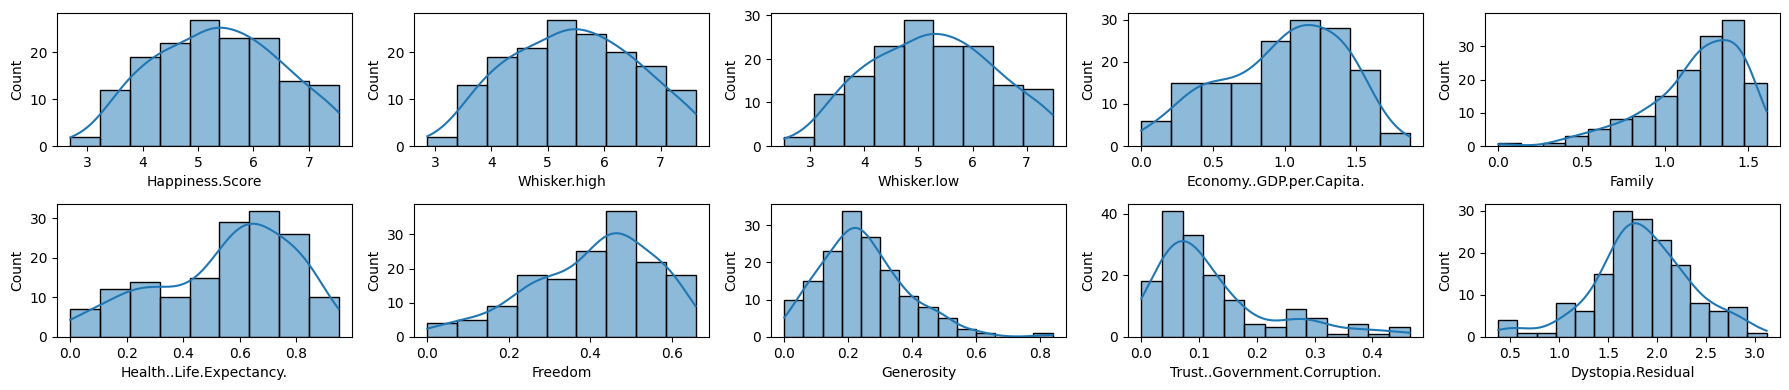

In [7]:
# Preliminary data cleaning/EDA
# df.isnull().sum() -> no missing values
# Drop country column for plotting
eda_df = df.drop(columns=['Country', 'Happiness.Rank'])

utils.histplot_maker(eda_df)

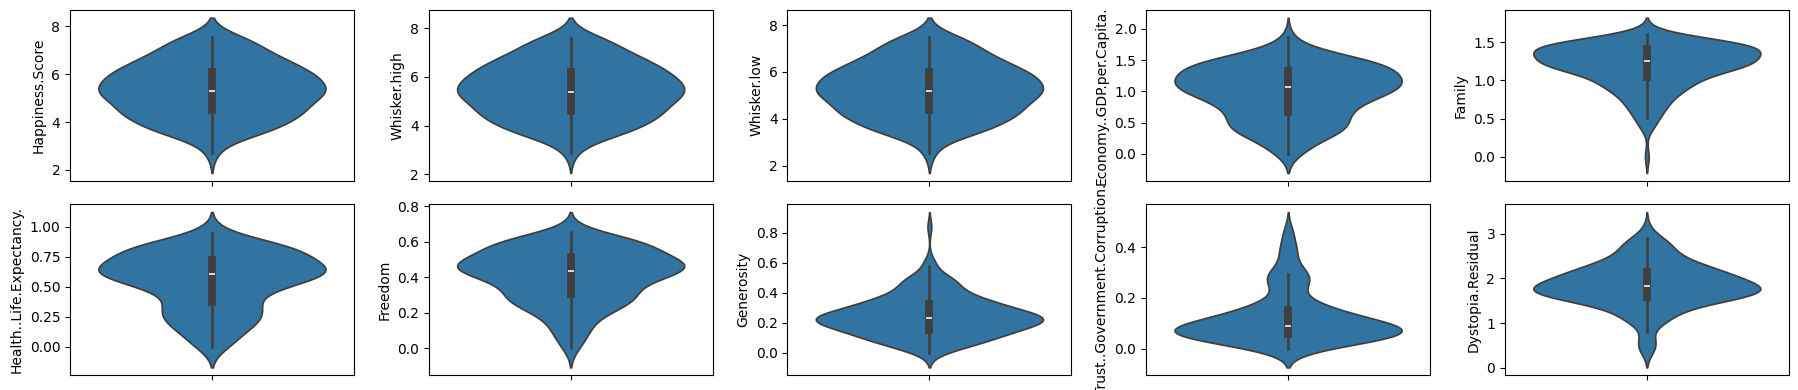

In [8]:
utils.violinplot_maker(eda_df)

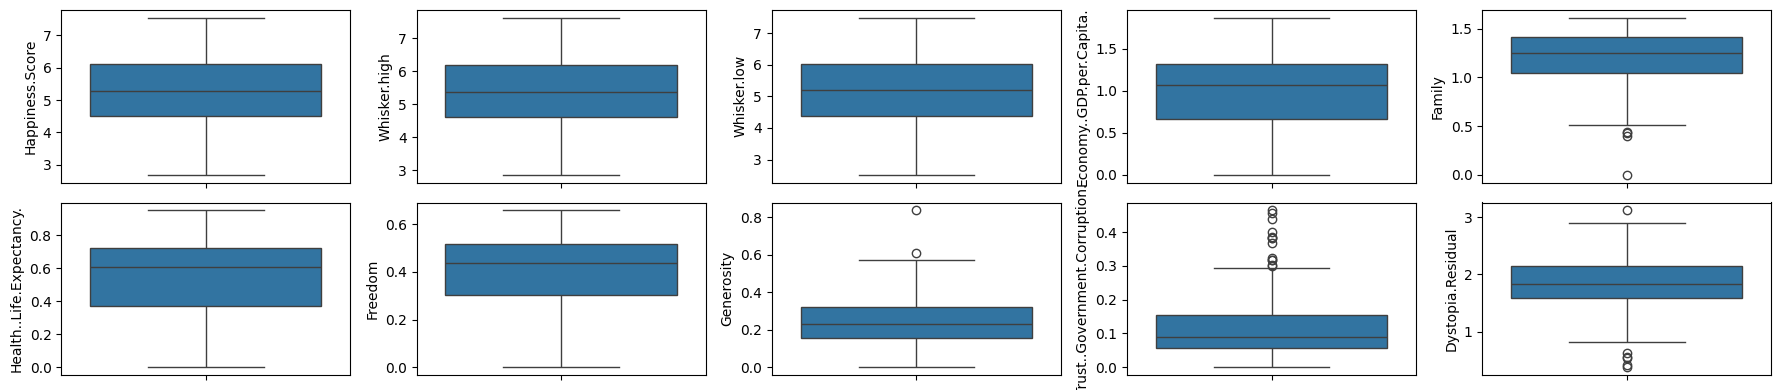

In [9]:
utils.boxplot_maker(eda_df)

# Clustering Tasks (Mandatory)

## Cluster by Economic and Social Factors (15 Marks)

- ### Can we cluster countries into distinct groups based on their economic and social factors?

First, we need to decide the columns to cluster for. Printing out the columns in a list, we get:

In [10]:
for d in df.columns:
    print(d)

Country
Happiness.Rank
Happiness.Score
Whisker.high
Whisker.low
Economy..GDP.per.Capita.
Family
Health..Life.Expectancy.
Freedom
Generosity
Trust..Government.Corruption.
Dystopia.Residual


From this, we can see that socio-economic factors are:

- Economy..GDP.per.Capita.
- Family
- Health..Life.Expectancy.
- Freedom
- Generosity
- Trust..Government.Corruption.
- Dystopia.Residual

We can create an array for these and then with the help of a KMeans clustering, cluster them together.

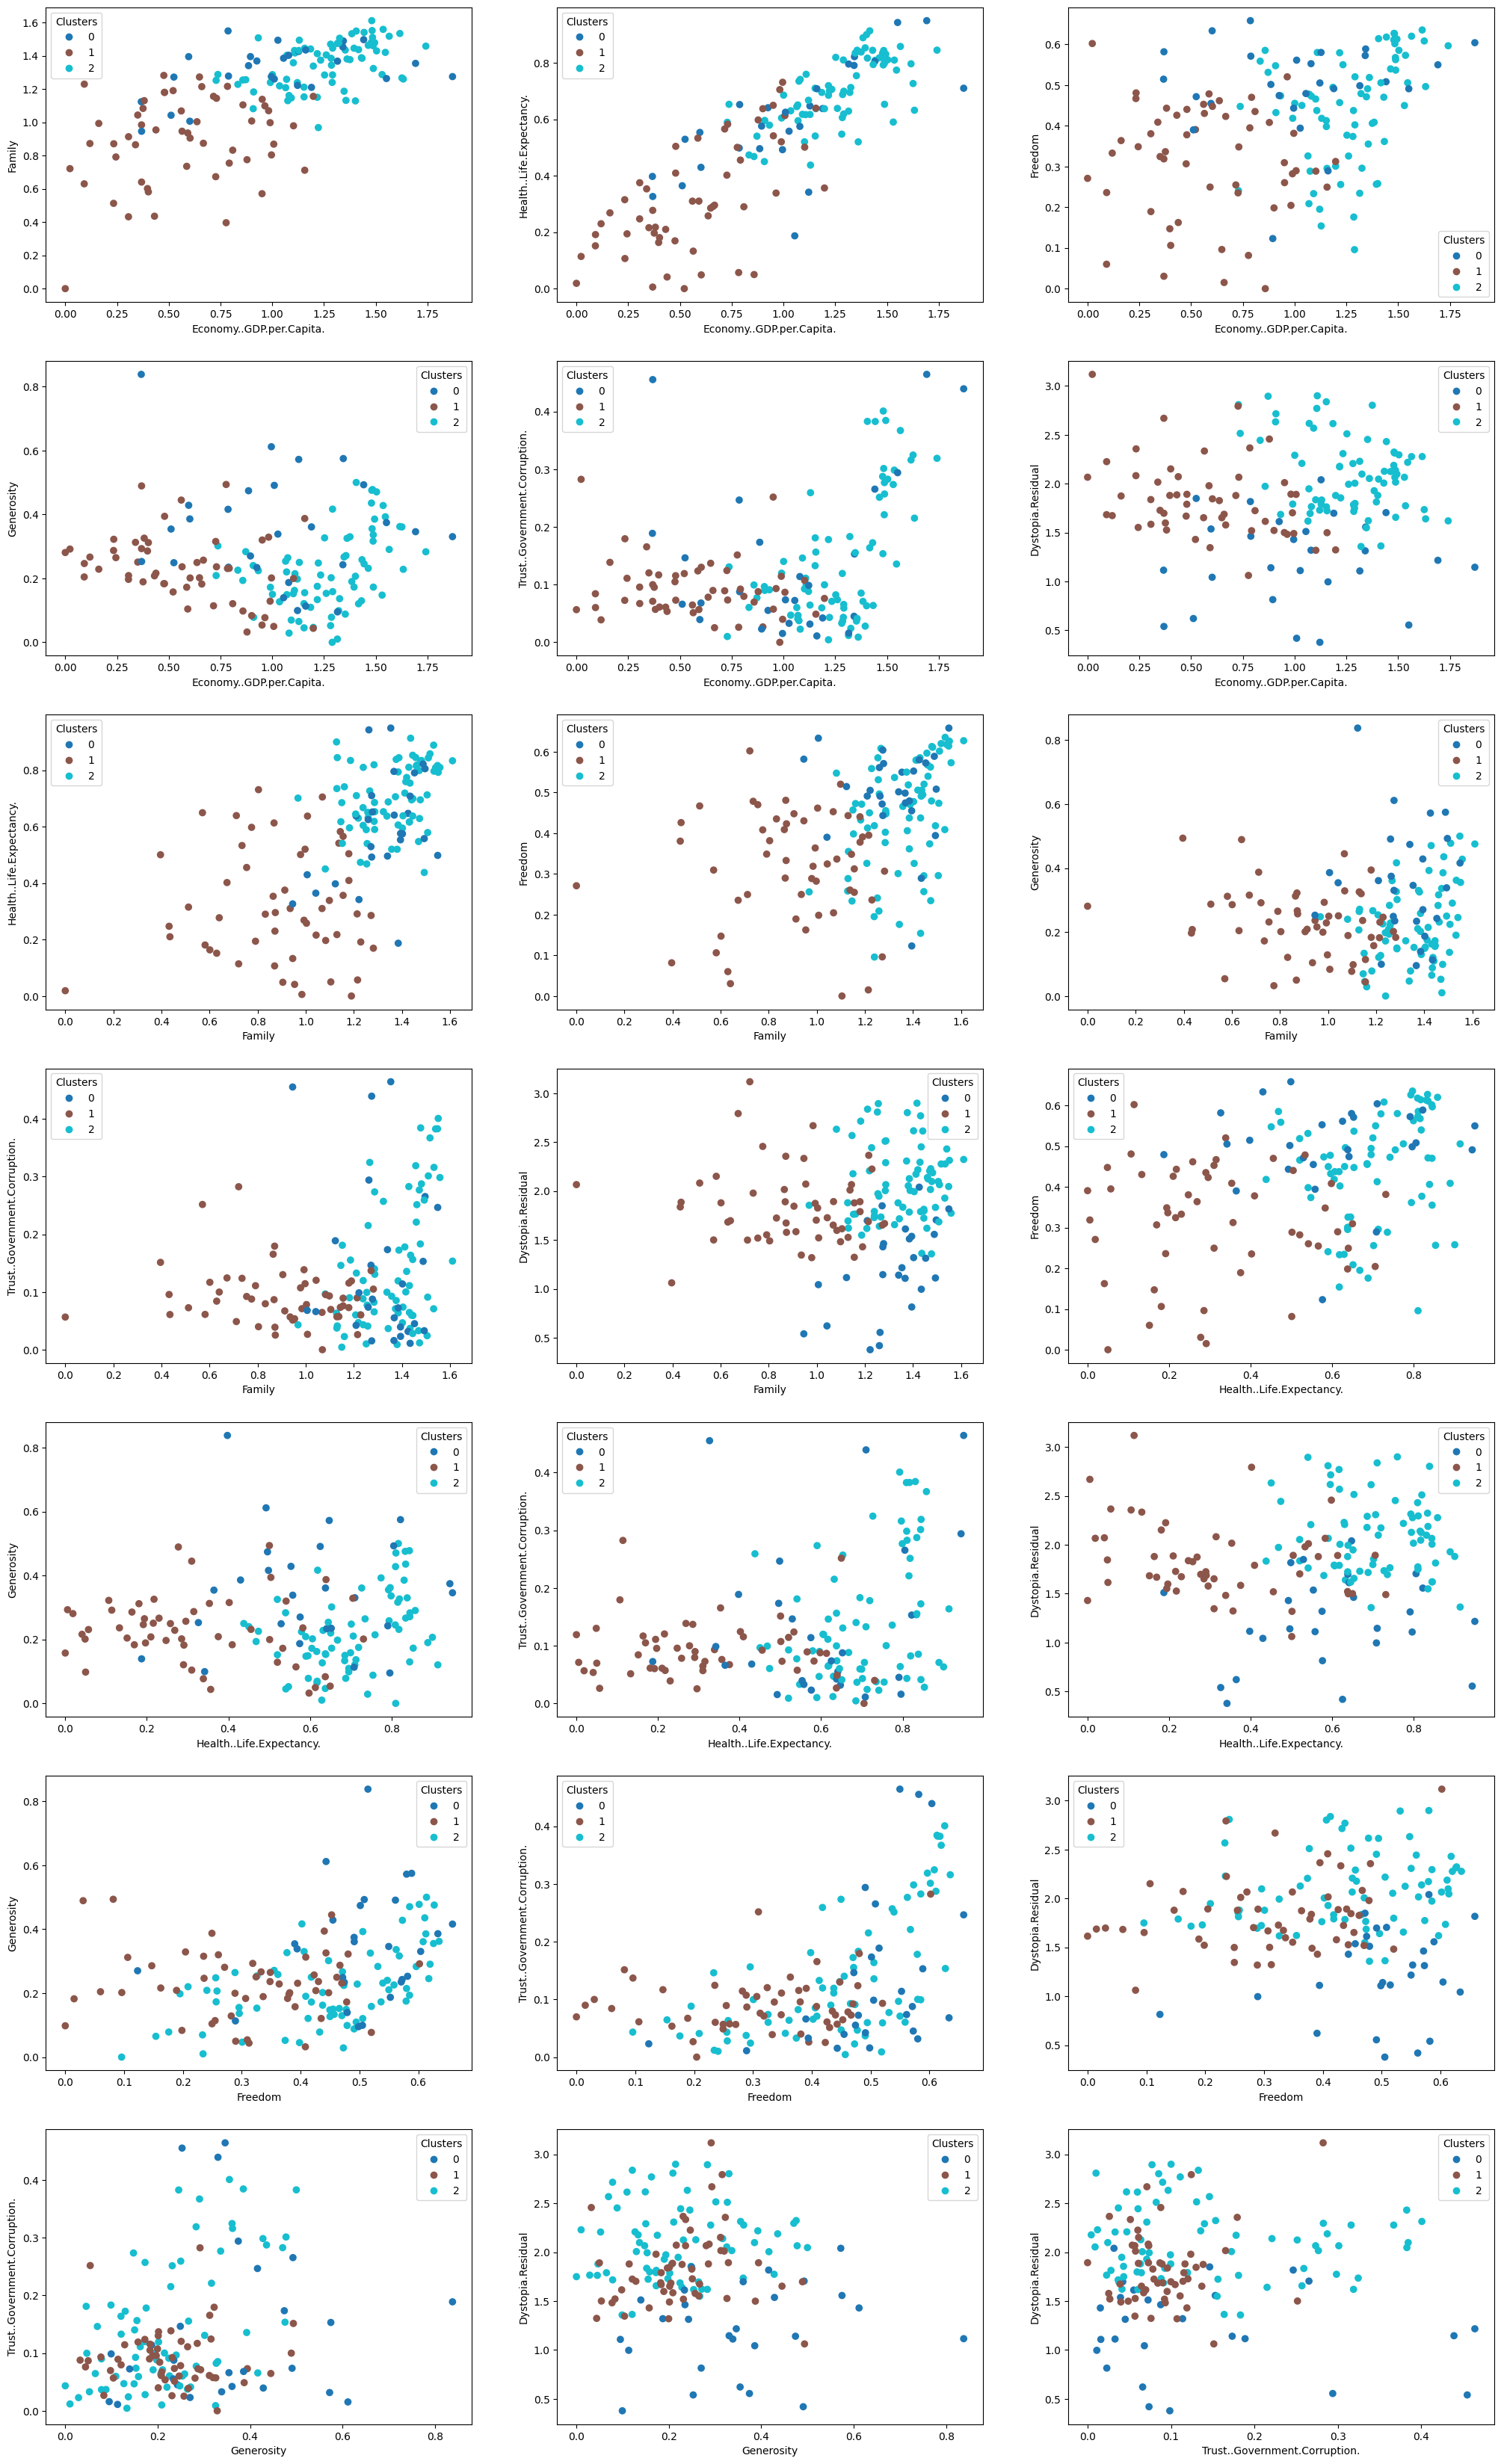

In [11]:
socioEconomicFactorsQ1 = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
scaledSocioEconomicFactors = StandardScaler().fit_transform(df[socioEconomicFactorsQ1])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaledSocioEconomicFactors)

utils.plotCluster(df[socioEconomicFactorsQ1], kmeans)

Looking at the clustermap above, the 1st thing that stands out is that `Economy..GDP.per.Capita` on the X-axis has pretty clear correlation with the Y-axis feature. Especially `family`, `Health..Life.Expectancy` and `Freedom`, the higher the X (towards the right), the higher the Y-value is (for the most part).

However, this doesn't hold true for every feature-pair. If you scroll down into `Generosity` on the X-axis, the clustering with `Trust..Government.Corruption` and `Dystopia.Residual` doesn't really show any spread. They are very much "one big cluster" with some outliers from all 3 clusterings.

So, to answer the question; Yes, you *can* cluster the countries into distinct groups based on economic and social factors, but the pairs don't always yield any information.

## Natural Clusters with Generosity and Life Expectancy (10 Marks)

- ### Are there natural clusters among countries when considering their generosity, life expectancy, and GDP per capita?

For this question, we can create a smaller array with those 3 columns and do another kmeans-clustering with only them.

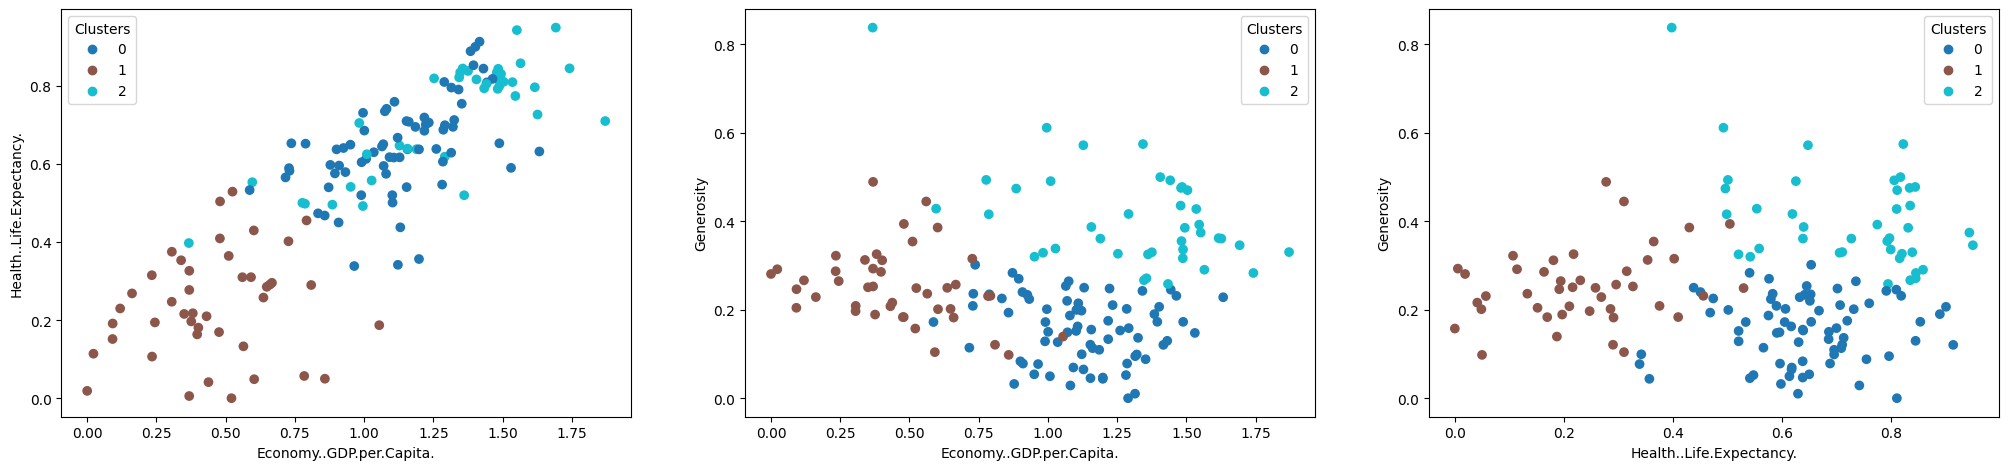

In [12]:
# Cluster countries based on generosity, life expectancy and GDP per capita
clusterArrayQ2 = ['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Generosity']
scaledClusterArray = StandardScaler().fit_transform(df[clusterArrayQ2])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaledClusterArray)

utils.plotCluster(df[clusterArrayQ2], kmeans)

Compared to the previous question, here we can see **very** clear clustering within the feature-pairs.

`Economy..GPD.per.Capita` seems to very clearly have an impact on `Health..Life.Expectancy`, which means that the more well off you are, you will generally live longer (probably from having better access to doctors/hospital/medicine). From the looks of the clustering, it's a very linear relationship. There is, however, some overlap between the light blue and dark blue (*Cluster 0 and cluster 2*). This means we can assume that the better your economy, the less the differences are between medium-to-high (personal/family) economies access to healthcare.

For the second cluster, `Economy..GPD.per.Capita` and `Generosity`, we see a clear trend towards the economy not really having any significant impact towards being generous. This could possibly imply that `Generosity` is controlled by something else.

For the third cluster, `Health..Life.Expectancy` and `Generosity`, we have clear clustering again. However, it's very much like the previous cluster, while there are distinct clusters, it does not necessarily have any impact on how generous people are.

We can conclude with the fact, **yes**, there are natural clusters among all the three features, but we can draw the conclusion that `Generosity` is not (heavily) impacted by a country's economic and health factors. These are likely impacted more by social factors - how the culture is, upbringing (and religion?).

## Clusters by Economic Freedom and Trust (10 Marks)

- ### Can countries be grouped into clusters that exhibit similar economic freedom and trust in government, and how do these clusters compare in terms of happiness scores?

For this one, we use the columns:

- Freedom
- Trust..Government.Corruption.

We can then create a scatterplot of this.

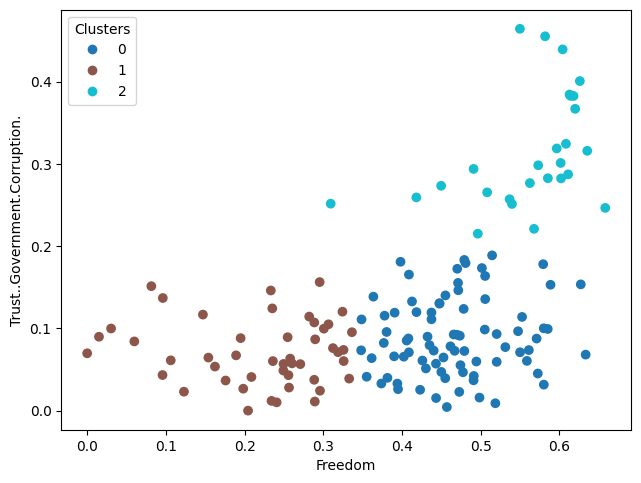

In [13]:
clusterArrayQ3 = ['Freedom', 'Trust..Government.Corruption.']
scaledClusterArray = StandardScaler().fit_transform(df[clusterArrayQ3])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaledClusterArray)

utils.plotCluster(df[clusterArrayQ3], kmeans)

**Yes**, you can very clearly see clustering *with no overlap* and a clear trend from cluster 0 to cluster 2 in terms of high/low `Trust..Government.Corruption`. Cluster 1 is very similar to cluster 0 in terms of the Y-axis, but show a lot higher value for economic `Freedom`.

We make the assumption going forwards that high levels of `Trust..Government.Corruption` means a high level of trust for the government, and not that it has a high level of corruption (we have not recevied any direct explanation for the features).

Next, we can compare the scatterplot clusters based on average and median happiness, to see what the happiness score is for each cluster.

Mean/average happiness per cluster: Cluster
0    5.358790
1    4.670383
2    6.529741
Name: Happiness.Score, dtype: float64

Median happiness per cluster: Cluster
0    5.311
1    4.714
2    6.863
Name: Happiness.Score, dtype: float64


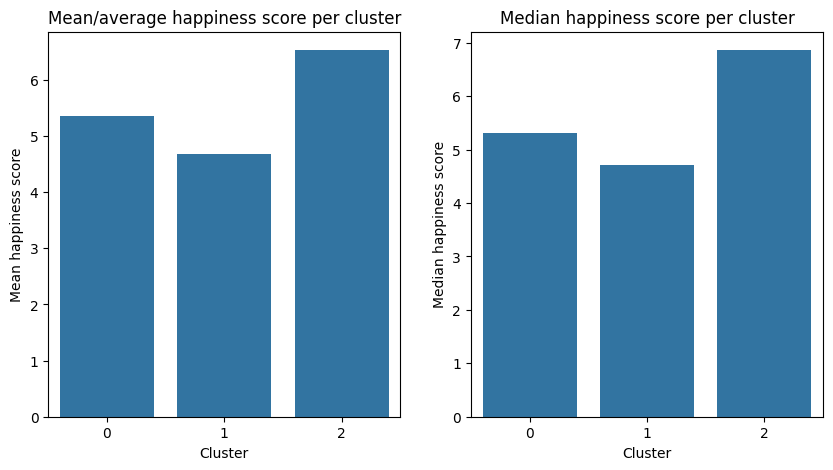

In [14]:
df_happinessComparison = df.copy()
df_happinessComparison['Cluster'] = kmeans.labels_

# Mean happiness score per cluster
mean_happiness_per_cluster = df_happinessComparison.groupby('Cluster')['Happiness.Score'].mean()

# Median happiness score per cluster
median_happiness_per_cluster = df_happinessComparison.groupby('Cluster')['Happiness.Score'].median()

print(f'Mean/average happiness per cluster: {mean_happiness_per_cluster}\n\nMedian happiness per cluster: {median_happiness_per_cluster}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=mean_happiness_per_cluster.index, y=mean_happiness_per_cluster.values)
plt.title('Mean/average happiness score per cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean happiness score')
plt.subplot(1, 2, 2)
sns.barplot(x=median_happiness_per_cluster.index, y=median_happiness_per_cluster.values)
plt.title('Median happiness score per cluster')
plt.xlabel('Cluster')
plt.ylabel('Median happiness score')
plt.show()

Compared to the happiness scores, we can clearly see that cluster #1 is lower overall but not by a whole lot compared to cluster #0.

**Cluster 2** on the other hand, seems to outperform both clusters quite heavily in happiness.

# Classification Tasks

## Predict Happiness Score Above 7.0 (20 Marks)

### Can we predict if a country will have a happiness score above 7.0 based on its GDP, social support, and health data?

Since this is a classification task, we will have to use a classification method - such as, for example, Random Forest.

We still have a clean version of the dataframe, named 'df'.

Confusion matrix:
[[28  1]
 [ 0  2]]



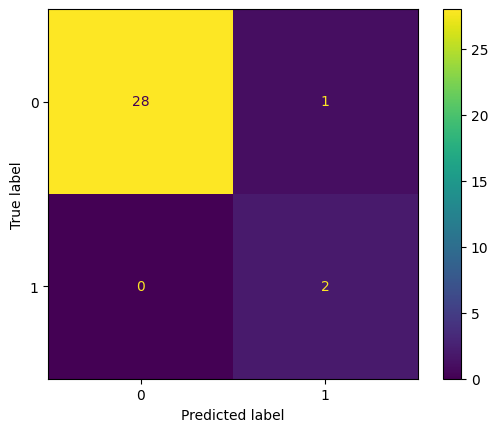

In [15]:
df_randomForest = df.copy()

# We want to target happiness score of 7 or higher. This encodes the target variable to 1 if the happiness score is 7 or higher, 0 otherwise
df_randomForest['Happiness.Target'] = (df_randomForest['Happiness.Score'] >= 7).astype(int)

# Test against these features
wanted_features = ['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Family']

# Drop happiness score, rank and country name
df_randomForest.drop(['Happiness.Score', 'Country', 'Happiness.Rank'], axis=1, inplace=True)

# Split data into features and target
data_features = df_randomForest[wanted_features]
data_target = df_randomForest['Happiness.Target']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=0)

# Initialize random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)

# Predict
y_pred = random_forest.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{conf_matrix}\n')

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=random_forest.classes_)
cm_display.plot()

In [16]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.967741935483871

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.67      1.00      0.80         2

    accuracy                           0.97        31
   macro avg       0.83      0.98      0.89        31
weighted avg       0.98      0.97      0.97        31



**Yes**, we can predict if a country has a happiness score of >= 7 based on the chosen paramaters. Based on the accuracy scores, we have a high level of recall which means false positives should not occur (too often, if at all).

## Classify Life Expectancy (15 Marks)

- ### Can countries be classified into two groups: "High Life Expectancy" and "Low Life Expectancy" based on their happiness score, economic, and social indicators?

Here, I will be attempting at least 2 algorithms, probably SVM and Logistic Regression to see which one performs better.

We have our dataset, so all we have to do is create target features and make the dataset ready for use.

Confusion matrix:
[[13  2]
 [ 2 14]]



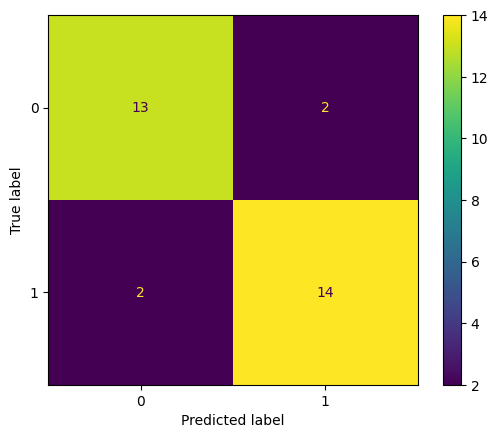

In [17]:
# Encode target variable 'Life.Expectancy.Target' to 1 if life expectancy is above or at the mean, 0 otherwise
eda_df['Life.Expectancy.Target'] = (eda_df['Health..Life.Expectancy.'] >= eda_df['Health..Life.Expectancy.'].mean()).astype(int)

features = eda_df[['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family']]
target_variable = eda_df['Life.Expectancy.Target']

X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=0)

logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{conf_matrix}\n')

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_regression.classes_)
cm_display.plot()

In [18]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.8709677419354839

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.88      0.88      0.88        16

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



Confusion matrix:
[[13  2]
 [ 2 14]]



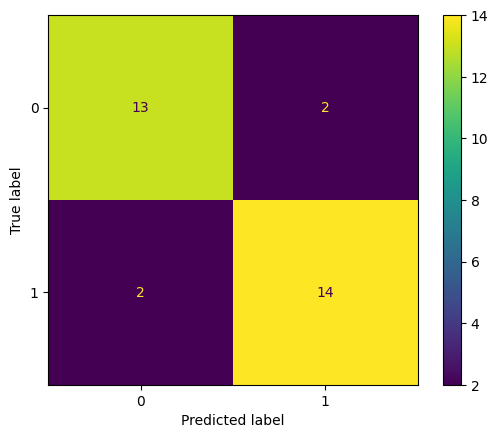

In [19]:
# Now we do the same for SVM
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{conf_matrix}\n')

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
cm_display.plot()

In [20]:
# Evaluation SVM
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.8709677419354839

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.88      0.88      0.88        16

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



Again, **yes**, we can classify countries into two groups based on happiness score, economic and social indicators. It's unknown how well this model would function with unseen data as the dataset we trained it on is not all too big, but the results of f1-scores of 0.87 is not too bad since we're not looking at high-stakes data (such as tumors).

# Regression Tasks

## Predict Happiness Score (20 Marks)

### Can we predict a country's happiness score based on its GDP, social support, life expectancy, freedom, and generosity?
Based on the information above, we can encode 0's and 1's as `Life.Expectancy.Target`, where high will be anything above the mean mark (`0.55`) for the feature `Health..Life.Expectancy`.

In [21]:
df_happiX = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity']
df_happiY = 'Happiness.Score'

#### Mini EDA

<function matplotlib.pyplot.show(close=None, block=None)>

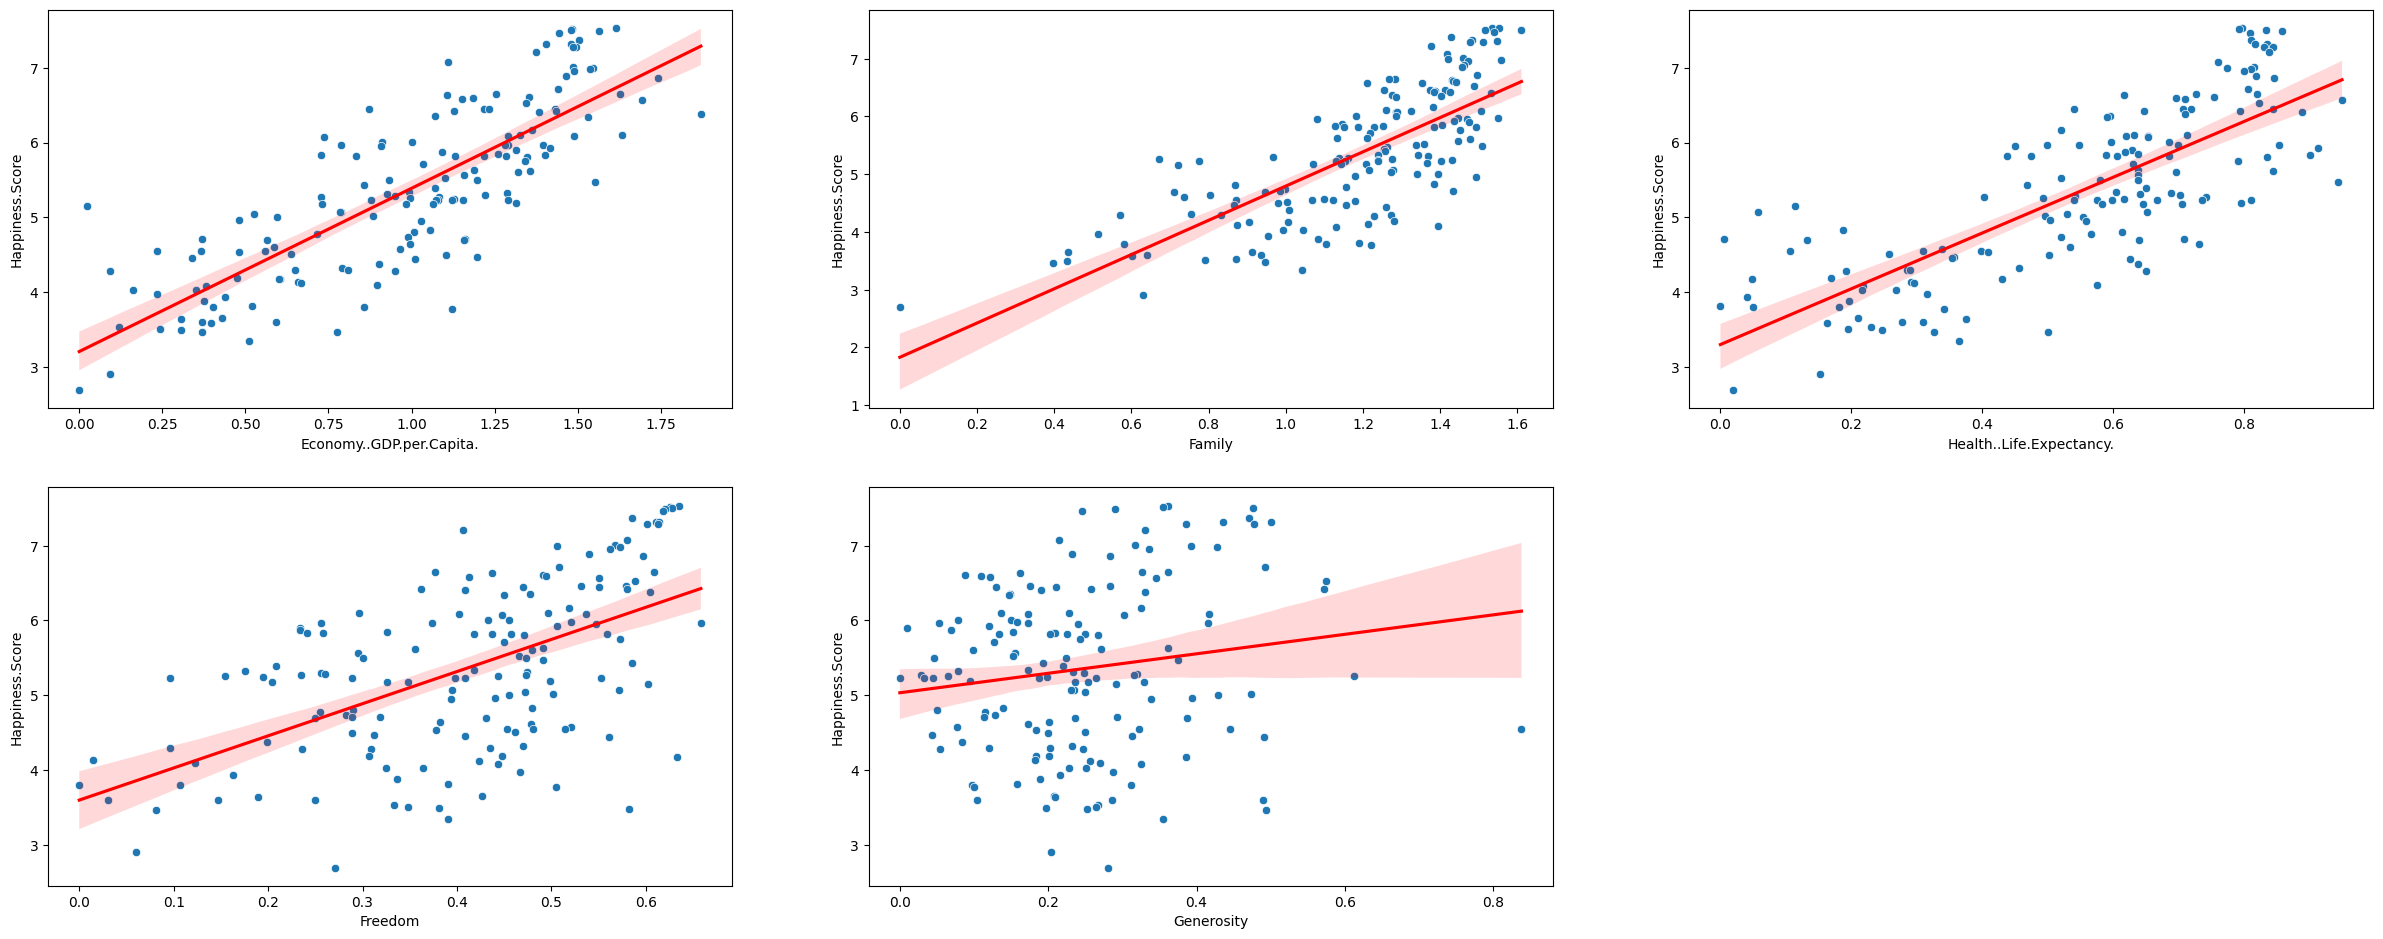

In [22]:
figLength = len(df_happiX) * 6

plt.figure(figsize=(30,figLength))
for i in range(len(df_happiX)):
    plt.subplot(len(df_happiX), 3, i+1)
    #plt.scatter(df[df_happiX[i]], df[df_happiY])
    sns.scatterplot(data=df, x=df_happiX[i], y=df_happiY)
    sns.regplot(data=df, x=df_happiX[i], y=df_happiY, scatter=False, color='red')
    plt.xlabel(df_happiX[i])
    plt.ylabel(df_happiY)
plt.show

Looking at the chart above, there is a heavy **linear correlation** with all the feature-sets *except* for `Generosity`, which funnily enough, once again shows that it doesn't really have any major correlation.

If we took away `Generosity` completely, this could be a simple linear regression model. Since this is not the case, we used a **Random Forest Regression** model.

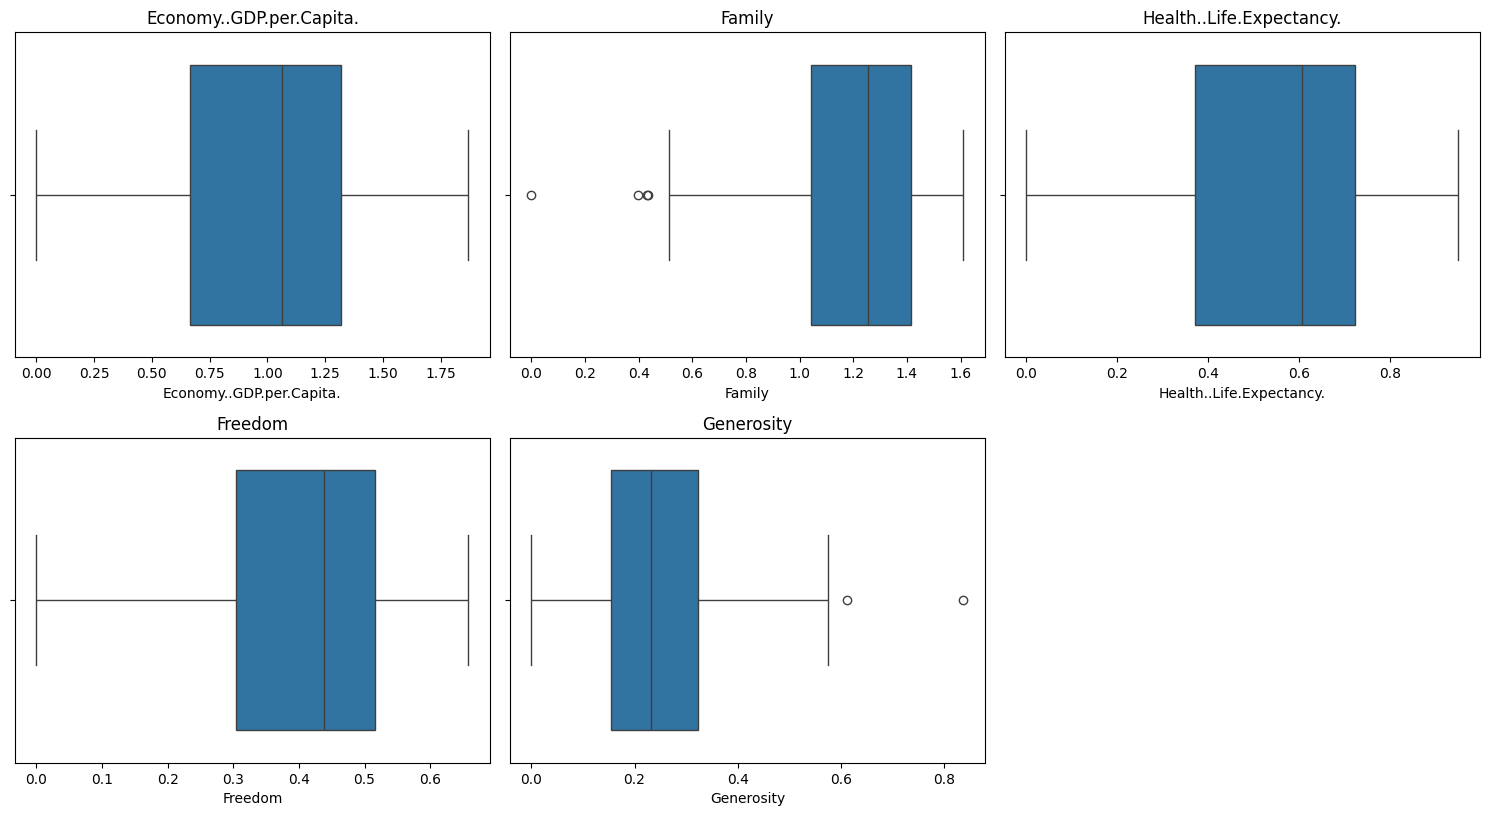

In [23]:
plotHeight = df[df_happiX].shape[1]
plt.figure(figsize=(15, 20))
for i in range(len(df_happiX)):
    plt.subplot(plotHeight, 3 , i + 1)
    sns.boxplot(x=df_happiX[i], data=df)
    plt.title(df_happiX[i])
plt.tight_layout()
plt.show()

We see a couple outliers, but it's not too bad. This reinforces the choice to use a Random Forest model.

In [24]:
happiRegXTrain, happiRegXTest, happiRegyTrain, happiRegyTest = train_test_split(df[df_happiX], df[df_happiY], test_size=0.2, random_state=42)

In [25]:
happiForestRegressor = RandomForestRegressor(n_estimators=100, random_state=42).fit(happiRegXTrain, happiRegyTrain)
happiForestRegPred_y = happiForestRegressor.predict(happiRegXTest)
utils.r2MSETest(happiRegyTest, happiForestRegPred_y)

Mean Squared Error: 0.24441065996500913 
R-squared: 0.8118567815700423


Looking at the **MSE** and **R^2** numbers, the model performs *fine*. It's not great, but it's also not awful. There is a chance for `Generosity` to have a negative impact on the model due to a couple outliers, and the fact that it doesn't really have any correlation with happiness, unlike the linearity of the rest of the features, as described above.

## Predict Freedom Score (15 Marks)

### Can the freedom score of a country be predicted based on GDP per capita, social support, and life expectancy?

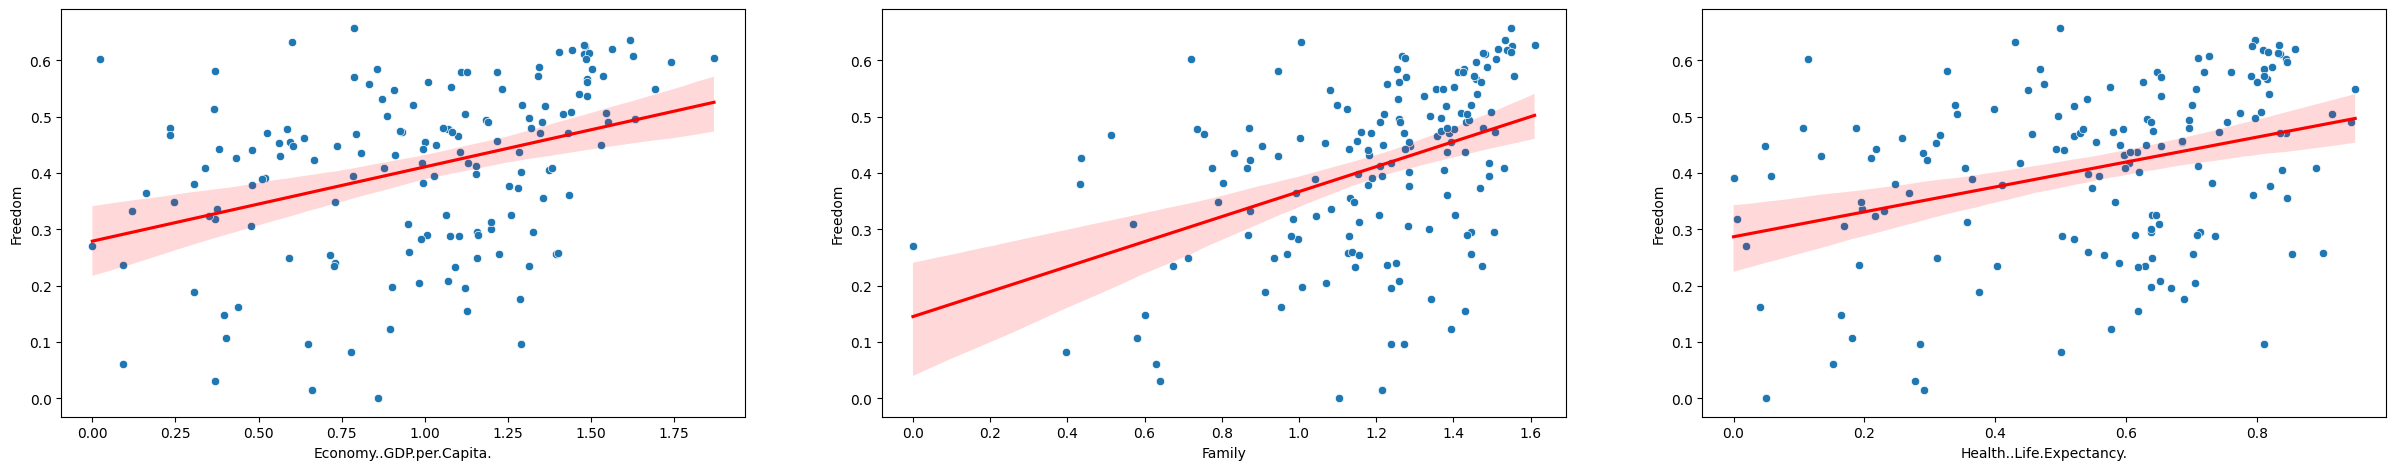

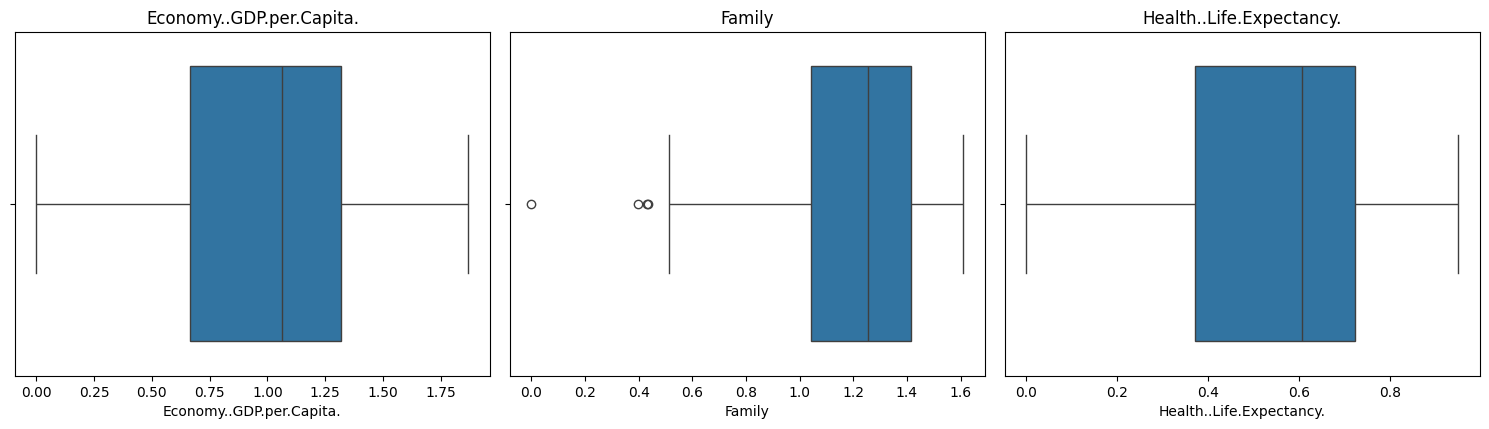

In [28]:
# Define the features and target
features = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.']
target = 'Freedom'

# Scatter plots with regression lines
fig_length = len(features) * 6
plt.figure(figsize=(30, fig_length))

for i in range(len(features)):
    plt.subplot(len(features), 3, i + 1)
    sns.scatterplot(data=df, x=features[i], y=target)
    sns.regplot(data=df, x=features[i], y=target, scatter=False, color='red')
    plt.xlabel(features[i])
    plt.ylabel(target)

plt.show()

# Box plots for the features
plot_height = df[features].shape[1]
plt.figure(figsize=(15, 12))

for i in range(len(features)):
    plt.subplot(plot_height, 3, i + 1)
    sns.boxplot(x=features[i], data=df)
    plt.title(features[i])
    plt.tight_layout()

plt.show()

In [27]:
# Prepare the data
df_regression = df.copy()

# Define the features and target
features = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.']
target = 'Freedom'

# Split the data into features (X) and target (y)
X = df_regression[features]
y = df_regression[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Random Forest Regression model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.014091168126997865
R^2 Score: 0.3511279849220107


Can the freedom score of a country be predicted based on GDP per capita, social support, and life expectancy?

The short answer; **No**.

The long answer, we attempted this task with 4 different regression models. The expectation was that at least one would perform adequately. The truth of the matter is that all of them sucked.

```c#
Linear Regression: Mean Squared Error: 0.016721868613518594 R^2 Score: 0.22998913324051928

Decision Tree Regression: Mean Squared Error: 0.04711900172976981 R^2 Score: -1.169742162275432

Random Forest Regression: Mean Squared Error: 0.014091168126997865 R^2 Score: 0.3511279849220107

Support Vector Regression: Mean Squared Error: 0.019549077408103584 R^2 Score: 0.09980144042080308
```

What's interesting here, is that all of them have a low `MSE` but an awful `R^2` score (low MSE = Good, high R^2 = Good).

If you look at the `Decision Tree Regression` model, the R^2 actually went **LOWER** than *negative* 1.

The conclusion we can draw here, is that using a Regression Model to predict a `Freedom` score can not be done (at least) with these features. Presumably, using different features could produce a better result. As it stands, a regression model with these features simply does not produce any viable results.